---

### Instructions

### Student Information
Name: Erdenejargal

Student ID: 113065430

GitHub ID: ErkaGlt

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
%load_ext autoreload
%autoreload 2

# 1.The Data

In [2]:
#Loading my dataset
import pandas as pd

df = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

In [3]:
df[0:10]

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
5,nostalgia,"Every time I heard this song as a child, I use..."
6,nostalgia,"My dad loved listening to Jim Reeves, when I w..."
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...
8,not nostalgia,Wherever you are you always in my heart
9,not nostalgia,Elvis will always be number one no one can com...


In [4]:
# Checking the first few rows and column names of the dataset. Data is already in a Pandas DataFrame format.
df.head()
print(df.columns)
type(df)

Index(['sentiment', 'comment'], dtype='object')


pandas.core.frame.DataFrame

In [5]:
len(df)

1500

In [6]:
#Exploring the data
df.isnull().sum()
# Counting the number of sentiment
df['sentiment'].value_counts()

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64

In [10]:
df.loc[:10, 'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

In [11]:
df.iloc[:10, 0]

0    not nostalgia
1        nostalgia
2        nostalgia
3    not nostalgia
4        nostalgia
5        nostalgia
6        nostalgia
7        nostalgia
8    not nostalgia
9    not nostalgia
Name: sentiment, dtype: object

In [12]:
# checking missing values
df.isnull()

,sentiment,comment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1495,False,False
1496,False,False
1497,False,False
1498,False,False


In [13]:
# Appling the function 'check_missing_values' from the data mining helpers module
# to check for missing values in each column of the DataFrame 'df'.
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda df: dmh.check_missing_values(df))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [14]:
#Checking duplicated values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [15]:
#It seems we have one duplicated value in our dataset
sum(df.duplicated())

1

In [16]:
len(df)

1500

In [17]:
df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
len(df)

1498

In [18]:
sum(df.duplicated())

0

# 2. Data Visualization for data exploring

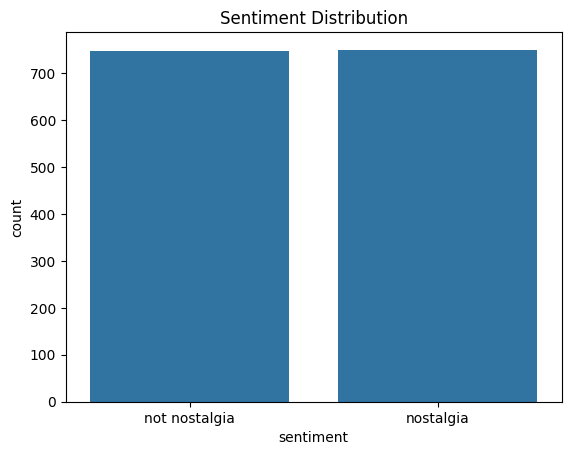

In [19]:
#Visualization1
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

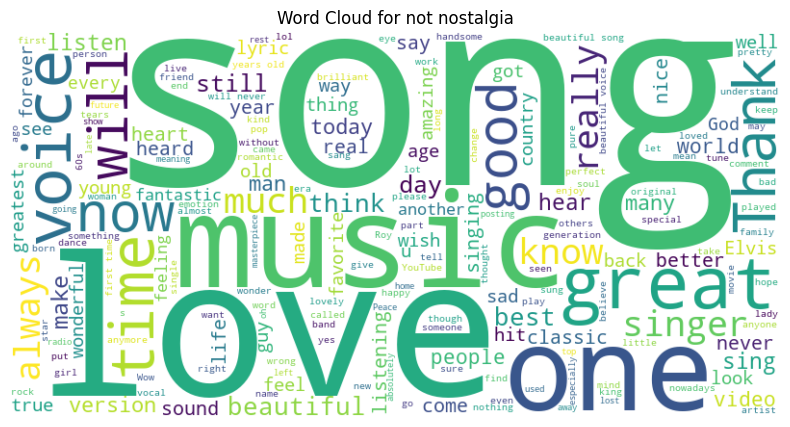

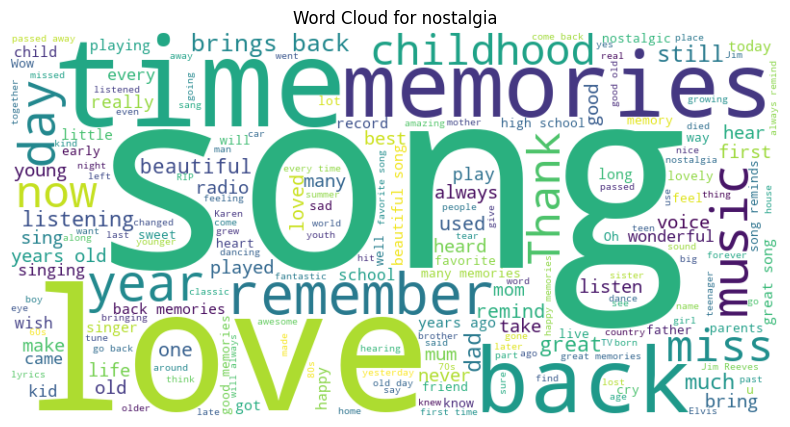

In [16]:
# Visualization2: Tried WordCloud type
from wordcloud import WordCloud

for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['comment'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment}')
    plt.axis('off')
    plt.show()

### 2.1 Text Preprocessing, dimensionality reduction, visualization of the data in 2D

In [21]:
#Converting the text to lowercase.
df['comment'] = df['comment'].str.lower() 

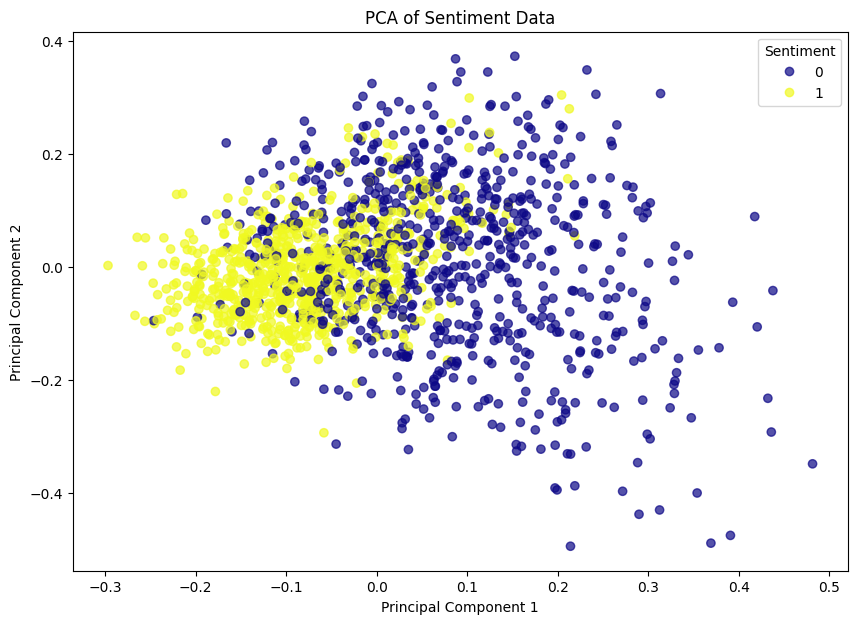

/var/folders/7n/_dqyh9s90jzfl2spwtn3yc0m0000gn/T/ipykernel_16601/505915076.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='term', data=top_terms, palette='plasma')


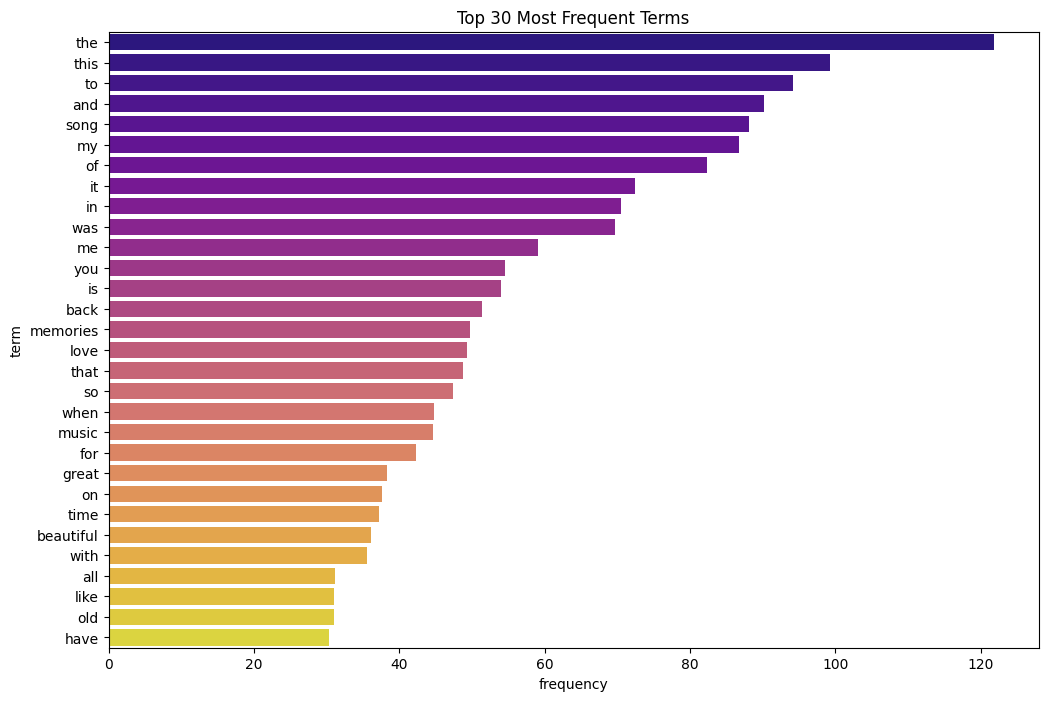

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Vectorizing the text using TF-IDF, convernting text into numerical value
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['comment'])

# PCA for dimensionality reduction
X_reduced = pca.fit_transform(X.toarray())

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='plasma', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Sentiment")
plt.title('PCA of Sentiment Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

term_frequencies = X.toarray().sum(axis=0)
terms = vectorizer.get_feature_names_out()
term_freq_df = pd.DataFrame({'term': terms, 'frequency': term_frequencies})
top_terms = term_freq_df.nlargest(30, 'frequency')  # Top 30 terms

plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='term', data=top_terms, palette='plasma')
plt.title('Top 30 Most Frequent Terms')
plt.show()

### 2.2 Tokenizing Text

In [17]:
import nltk

In [25]:
# Creating a new column 'unigrams' by tokenizing the text in the 'comment' column
df['unigrams'] = df['comment'].apply(lambda df: dmh.tokenize_text(df))

In [26]:
df[0:4]["unigrams"]

0    [he, was, a, singer, with, a, golden, voice, t...
1    [the, mist, beautiful, voice, ever, i, listene...
2    [i, have, most, of, mr., reeves, songs, ., alw...
3    [30, day, leave, from, 1st, tour, in, viet, na...
Name: unigrams, dtype: object

In [27]:
## Extracting the 'unigrams' from the first row of the DataFrame and converts it into a list
list(df[0:1]['unigrams'])

[['he',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'i',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'i',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'i',
  'can',
  'vouch',
  'for',
  'jim',
  'reeves',
  'all',
  'the',
  'time',
  '.',
  'you',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'thank',
  'you',
  'lord',
  'for',
  'his',
  'life',
  '.']]

### 2.3 Converting to TF-IDF Matrix

In [29]:
# Converting comments to a TF-IDF matrix with the top 1000 terms and removes English stop words
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df['comment'])

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.head())

    10  100   11   12   13   14   15   16        17   18  ...  yeah  year  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.183991  0.0  ...   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   

      years  yes  yesterday  young  younger  youth  youtube  yrs  
0  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  0.0  
1  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  0.0  
2  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  0.0  
3  0.092264  0.0        0.0    0.0      0.0    0.0      0.0  0.0  
4  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  0.0  

[5 rows x 1000 columns]


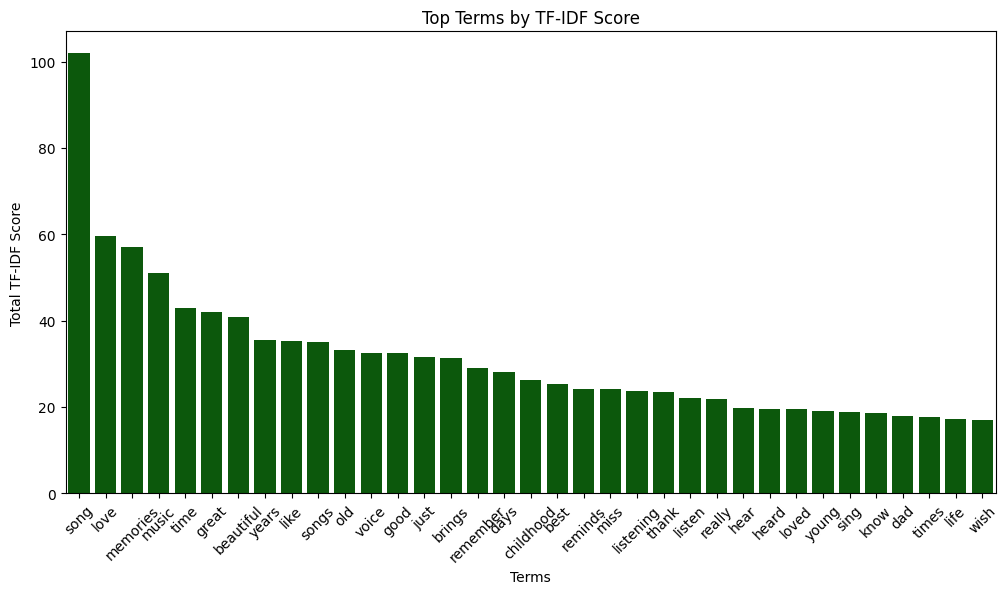

In [30]:
#Computing total TF-IDF scores for each,and visualizing the top 35 terms with their respective scores using a bar plot
term_frequencies = tfidf_df.sum(axis=0) 

sorted_indices = term_frequencies.sort_values(ascending=False).index
sorted_frequencies = term_frequencies.sort_values(ascending=False).values

top_n = 35 

top_terms = sorted_indices[:top_n]
top_frequencies = sorted_frequencies[:top_n]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_terms, y=top_frequencies, color='#006400')
plt.xticks(rotation=45)
plt.xlabel('Terms')
plt.ylabel('Total TF-IDF Score')
plt.title('Top Terms by TF-IDF Score')
plt.show()

### 2.4 Finding frequent patterns

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to create a term-document frequency DataFrame from the 'comment' column
def create_term_document_df(df):
    count_vect = CountVectorizer() 
    X_counts = count_vect.fit_transform(df['comment']) 
    
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    return term_document_df
term_document_df = create_term_document_df(df)
print("Term-Document Frequency DataFrame:")
print(term_document_df)

Term-Document Frequency DataFrame:
      00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
0      0    0    0   0   0    0    0   0     0   0  ...      0         0   
1      0    0    0   0   0    0    0   0     0   0  ...      0         0   
2      0    0    0   0   0    0    0   0     0   0  ...      0         0   
3      0    0    0   0   0    0    0   0     0   0  ...      0         0   
4      0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1493   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1494   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1495   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zeala

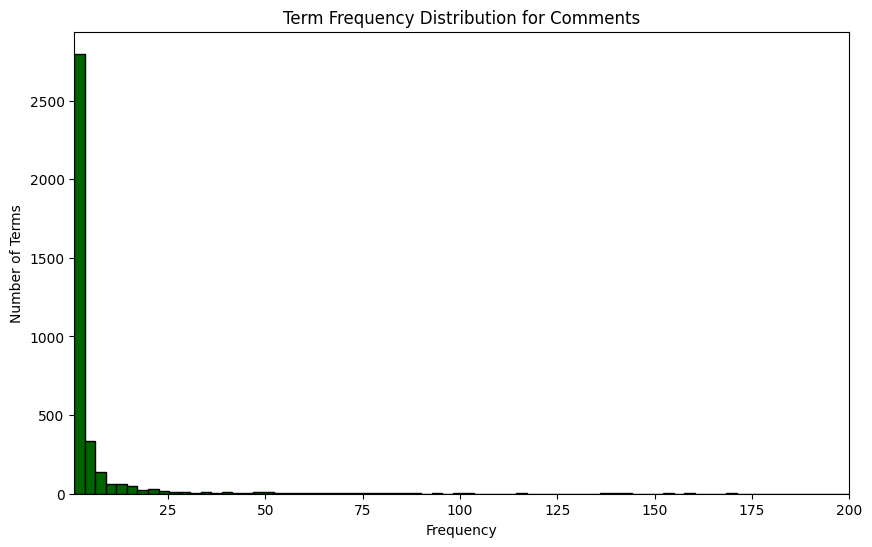

In [40]:
# Sum over all documents to get total frequency for each word
word_counts = term_document_df.sum(axis=0).to_numpy()
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=500, color='darkgreen', edgecolor='black') 
plt.title('Term Frequency Distribution for Comments')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [44]:
import numpy as np
word_counts = term_document_df.sum(axis=0).to_numpy()
sorted_indices = np.argsort(word_counts)[::-1] 
sorted_counts = np.sort(word_counts)[::-1] 

total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)
top_5_percent_indices = sorted_indices[:top_5_percent_index]

filtered_words = [term_document_df.columns[i] for i in top_5_percent_indices]

print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Number of terms in top 5%: 186
Filtered terms: ['the', 'this', 'to', 'and', 'my', 'song', 'of', 'in', 'it', 'was', 'me', 'is', 'you', 'that', 'so', 'love', 'when', 'back', 'for', 'music', 'memories', 'on', 'with', 'time', 'great', 'but', 'have', 'years', 'all', 'he', 'beautiful', 'as', 'like', 'one', 'songs', 'old', 'just', 'her', 'we', 'she', 'at', 'be', 'from', 'good', 'now', 'not', 'can', 'voice', 'what', 'remember', 'always', 'his', 'still', 'they', 'much', 'brings', 'will', 'are', 'never', 'days', 'many', 'had', 'very', 'up', 'am', 'best', 'listening', 'him', 'thank', 'first', 'these', 'really', 'who', 'miss', 'how', 'listen', 'out', 'hear', 'about', 'were', 'childhood', 'no', 'heard', 'ever', 'reminds', 'those', 'there', 'loved', 'would', 'by', 'only', 'sing', 'know', 'more', 'has', 'an', 'every', 'if', 'life', 'dad', 'could', 'young', 'some', 'then', 'today', 'such', 'used', 'don', 'day', 'think', 'singing', 'thanks', 'times', 'played', 'been', 'school', 'again', 'do', 'singer',

## 3.Naive Bayes classifier 

Database size (total no of transactions) : 1501
Number of items : 1500
Minimum Transaction Size : 1
Average Transaction Size : 1.0
Maximum Transaction Size : 1
Standard Deviation Transaction Size : 0.0
Variance in Transaction Sizes : 0
Sparsity : 0.9993333333333333


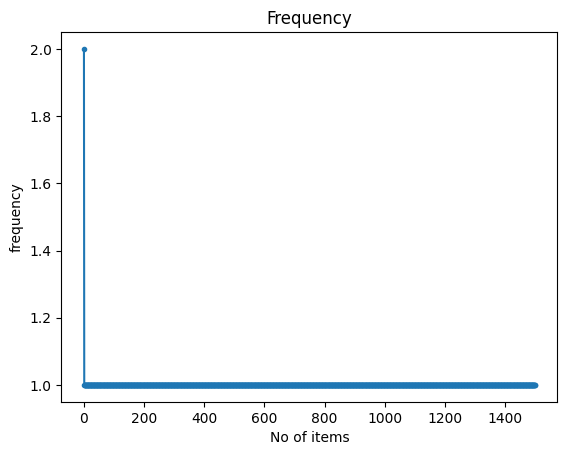

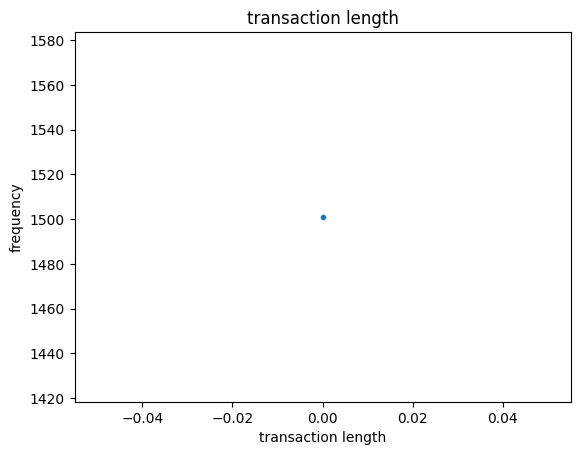

In [45]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [50]:
# Spliting the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['sentiment'], test_size=0.2, random_state=42)

In [52]:
#TF-IDF Naive Bayes Classifier: I used MultinomialNB, becasude ourd data is text based and this type of NB is more suitable for text.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

nb_tfidf = MultinomialNB()

nb_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("Naive Bayes Classifier with TF-IDF Features")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

Naive Bayes Classifier with TF-IDF Features
Accuracy: 0.8566666666666667
               precision    recall  f1-score   support

    nostalgia       0.80      0.95      0.87       148
not nostalgia       0.94      0.77      0.84       152

     accuracy                           0.86       300
    macro avg       0.87      0.86      0.86       300
 weighted avg       0.87      0.86      0.86       300



In [48]:
#CountVectorize Naive Bayes Classifier:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english', max_features=1000)

X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

nb_counts = MultinomialNB()

nb_counts.fit(X_train_counts, y_train)

y_pred_counts = nb_counts.predict(X_test_counts)

print("Naive Bayes Classifier with Word Frequency Features")
print("Accuracy:", accuracy_score(y_test, y_pred_counts))
print(classification_report(y_test, y_pred_counts))

Naive Bayes Classifier with Word Frequency Features
Accuracy: 0.8433333333333334
               precision    recall  f1-score   support

    nostalgia       0.79      0.93      0.85       148
not nostalgia       0.91      0.76      0.83       152

     accuracy                           0.84       300
    macro avg       0.85      0.84      0.84       300
 weighted avg       0.85      0.84      0.84       300



In [56]:
#Gaussian Naive Bayes classifier for TFIDF
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Convert sparse matrix to dense array
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()
nb_tfidf = GaussianNB()
nb_tfidf.fit(X_train_dense, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_dense)
print("Gaussian Naive Bayes Classifier with TF-IDF Features")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

Gaussian Naive Bayes Classifier with TF-IDF Features
Accuracy: 0.7033333333333334
               precision    recall  f1-score   support

    nostalgia       0.66      0.82      0.73       148
not nostalgia       0.77      0.59      0.67       152

     accuracy                           0.70       300
    macro avg       0.72      0.70      0.70       300
 weighted avg       0.72      0.70      0.70       300



In [58]:
#CountVectorize Gaussian Naive Bayes classifier:
count_vect = CountVectorizer(stop_words='english', max_features=1000)

X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

X_train_dense = X_train_counts.toarray()
X_test_dense = X_test_counts.toarray()

nb_counts = GaussianNB()
nb_counts.fit(X_train_dense, y_train)
y_pred_counts = nb_counts.predict(X_test_dense)

print("Gaussian Naive Bayes Classifier with Word Frequency Features")
print("Accuracy:", accuracy_score(y_test, y_pred_counts))
print(classification_report(y_test, y_pred_counts))

Gaussian Naive Bayes Classifier with Word Frequency Features
Accuracy: 0.6766666666666666
               precision    recall  f1-score   support

    nostalgia       0.61      0.95      0.74       148
not nostalgia       0.89      0.41      0.57       152

     accuracy                           0.68       300
    macro avg       0.75      0.68      0.65       300
 weighted avg       0.75      0.68      0.65       300



## 4. Conclusion

For the Naive Bayes classification, I used both Multinomial Naive Bayes and Gaussian Naive Bayes with TF-IDF and CountVectorizer.
From the results above, it is clear that the Multinomial Naive Bayes Classifier with TF-IDF is the most suitable option for our dataset. It performs well, especially in terms of precision for both nostalgia and not nostalgia classes, ensuring accurate classification for both categories.

The lab exercises have some areas where the data processing could be done better for improved results:

The lab suggests removing data with missing values, but this isn't always the best choice, especially with large datasets. There are better ways to handle missing data, like filling in values based on averages or other methods.

We used NLTK for basic text processing, but there are other tools, like SpaCy, that do a better job with tasks like breaking text into words and finding the base form of words. Using these tools could help get more useful features from the text.

Also, we struggled with too many features in the term-document matrix, making it difficult to work with. When running FAE Top-K and MaxFPGrowth algorithms, we also faced problems with the large size of the data because these algorithms don’t work well with very large datasets.

Some visualizations took a lot of computing power because of the large number of terms. Reducing the number of terms or filtering based on term frequency could make the visualizations clearer and faster to generate.